# LABORATORIO DE AEROLINEAS
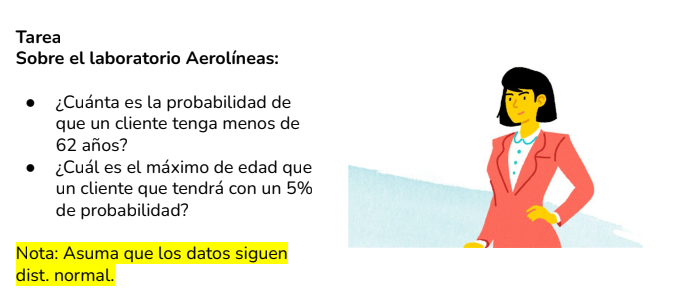

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [42]:
test='test.csv'
train='train.csv'
train=pd.read_csv(train,sep=',')
test=pd.read_csv(test,sep=',')

In [43]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [44]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


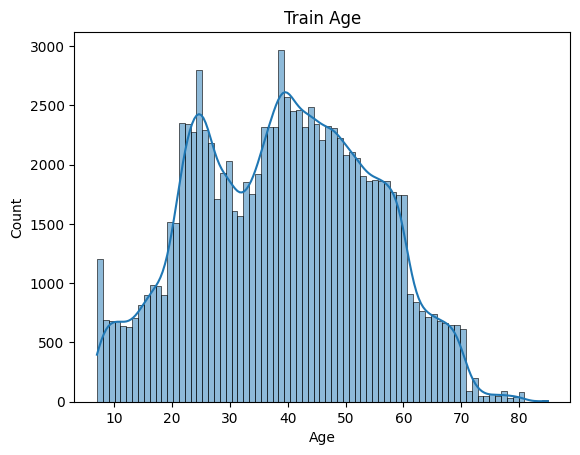

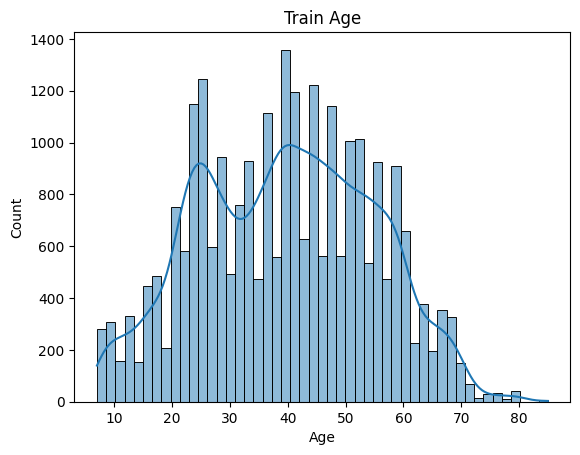

In [45]:
def plot_histogram(data, x_col, title):
    sns.histplot(data=data, x=x_col,kde=True)
    plt.title(title)
    plt.show()
plot_histogram(train, 'Age', 'Train Age')
plot_histogram(test, 'Age', 'Train Age')



## **PREGUNTA 1 : ¿Cuánta es la probabilidad de que un cliente tenga menos de 62 años?**

In [54]:
from scipy.stats import norm

def calcular_z_score(train,edad_interes):
    # Calcular la media y la desviación estándar de las edades en tu conjunto de datos
    media = train['Age'].mean()
    desv_est = train['Age'].std()
    # Calcular el z-score
    z_score = (edad_interes - media) / desv_est
    # Calcular el valor correspondiente en la distribución normal acumulativa (CDF)
    valor_z_cdf = norm.cdf(z_score)
    # Devolver el valor de z en la tabla de distribución
    return valor_z_cdf
# Ejemplo de uso con tu conjunto de datos train
train_z_score = calcular_z_score(train,62)
print("El valor de z en la tabla train para la probabilidad de que un cliente tenga menos de 62 años:", round(train_z_score*100,2),"%")
test_z_score = calcular_z_score(test,62)
print("El valor de z en la tabla test para la probabilidad de que un cliente tenga menos de 62 años:", round(test_z_score*100,2),"%")

El valor de z en la tabla train para la probabilidad de que un cliente tenga menos de 62 años: 93.27 %
El valor de z en la tabla test para la probabilidad de que un cliente tenga menos de 62 años: 93.04 %


## **PREGUNTA 2 : ¿Cuál es el máximo de edad que un cliente que tendrá con un 5% de probabilidad?**

In [63]:
def max_edad_con_5_porcentaje(train):
    # Calcular la media y la desviación estándar de las edades en tu conjunto de datos
    media = train['Age'].mean()
    desv_est = train['Age'].std()
    # Calcular el percentil 95 de la distribución normal utilizando la función ppf
    max_edad = norm.ppf(0.95, loc=media, scale=desv_est)
    
    return max_edad

# Ejemplo de uso con tu conjunto de datos train
max_edad_5_porcentaje = max_edad_con_5_porcentaje(test)
print('Data Test')
print("El máximo de edad que un cliente tendrá con un 5% de probabilidad es:", int(max_edad_5_porcentaje))

# Ejemplo de uso con tu conjunto de datos train
max_edad_5_porcentaje = max_edad_con_5_porcentaje(train)
print('Data Train')
print("El máximo de edad que un cliente tendrá con un 5% de probabilidad es:", int(max_edad_5_porcentaje))


Data Test
El máximo de edad que un cliente tendrá con un 5% de probabilidad es: 64
Data Train
El máximo de edad que un cliente tendrá con un 5% de probabilidad es: 64
